In [58]:
import  os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from utils.dataProcess import ts2batch_ctx_tar


In [59]:
os.getcwd()

'/Users/I562243/Documents/to_send_GD/code/kit/AWS/traffic_data/hist_aws/NS_transformer_tim_ETTh2'

In [60]:


# Path to your file
file_path = os.path.join(os.getcwd(),'data/ETTh2.csv')

# Load the CSV file into a numpy array
#data = np.genfromtxt(file_path, delimiter=',', skip_header=1, dtype=None, names=True)
data = pd.read_csv(file_path)

# Display the loaded data
print(data)

                      date       HUFL    HULL       MUFL    MULL    LUFL  \
0      2016-07-01 00:00:00  41.130001  12.481  36.535999   9.355   4.424   
1      2016-07-01 01:00:00  37.528000  10.136  33.936001   7.532   4.435   
2      2016-07-01 02:00:00  37.946999  11.309  35.330002   9.007   2.100   
3      2016-07-01 03:00:00  38.952000  11.895  35.543999   9.436   3.380   
4      2016-07-01 04:00:00  38.113998  11.476  35.410000   9.623   2.036   
...                    ...        ...     ...        ...     ...     ...   
17415  2018-06-26 15:00:00  39.202999  11.392  49.644001  11.929 -10.331   
17416  2018-06-26 16:00:00  38.113998  10.974  48.759998  11.366 -10.331   
17417  2018-06-26 17:00:00  39.622002  10.974  50.609001  11.661 -11.557   
17418  2018-06-26 18:00:00  43.643002  13.403  54.737000  13.778 -10.299   
17419  2018-06-26 19:00:00  38.868000  10.052  49.859001  10.669 -11.525   

        LULL         OT  
0      1.311  38.661999  
1      1.215  37.124001  
2      0.

In [61]:
data['OT']

0        38.661999
1        37.124001
2        36.465000
3        33.608501
4        31.850500
           ...    
17415    47.084999
17416    48.183498
17417    48.183498
17418    46.865501
17419    45.986500
Name: OT, Length: 17420, dtype: float64

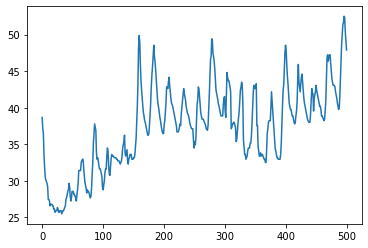

In [62]:
plt.plot(data['OT'][:500])

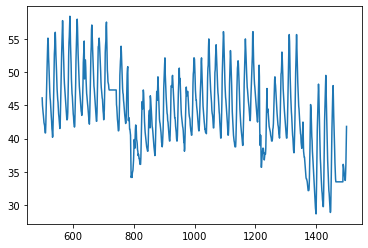

In [63]:
plt.plot(data['OT'][500:1500])


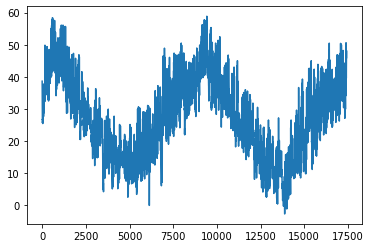

In [64]:
plt.plot(data['OT'])


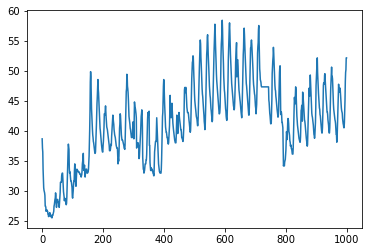

In [65]:
plt.plot(data['OT'][:1000])

In [66]:
from utils.dataProcess import ts2batch_ctx_tar

In [67]:
arr = data['OT'].to_numpy()
N_tr = int(0.7*len(arr))
N_tr

12194

In [77]:
17420/5

3484.0

In [80]:

arr_train_flat , arr_test_flat = arr[:N_tr] , arr[N_tr:]
mean  = np.mean(arr_train_flat , axis=0)
sigma = np.std(arr_train_flat  , axis=0)
normalizer={"mean":mean,"sigma":sigma}

arr_train_batched   ,centers_train   = ts2batch_ctx_tar(arr_train_flat,n_batch=int(3500*0.7) , len_ctx=96 , len_tar=1) # inside the function the repetitce centers are removed
arr_test_batched    ,centers_test    = ts2batch_ctx_tar(arr_train_flat,n_batch=int(3500*0.3) , len_ctx=96 , len_tar=1)



In [81]:

arr_train_batched = np.expand_dims(arr_train_batched , axis=-1)
arr_test_batched = np.expand_dims(arr_test_batched , axis=-1)
arr_train_flat = np.expand_dims(arr_train_flat , axis=-1)
arr_test_flat = np.expand_dims(arr_test_flat , axis=-1)




print(arr_train_batched.shape)
print(arr_test_batched.shape)
print(arr_train_flat.shape)
print(arr_test_flat.shape)


print(mean,sigma)
print(normalizer['mean'])

(2450, 97, 1)
(1050, 97, 1)
(12194, 1)
(5226, 1)
28.8171697171258 11.403355472095313
28.8171697171258


In [82]:


with open('etth_train_batched.pickle', 'wb') as handle11:
    pickle.dump(arr_train_batched, handle11, protocol=pickle.HIGHEST_PROTOCOL)

with open('etth_test_batched.pickle', 'wb') as handle11:
    pickle.dump(arr_test_batched, handle11, protocol=pickle.HIGHEST_PROTOCOL)

with open('etth_train_flat.pickle', 'wb') as handle11:
    pickle.dump(arr_train_flat, handle11, protocol=pickle.HIGHEST_PROTOCOL)

with open('etth_test_flat.pickle', 'wb') as handle11:
    pickle.dump(arr_test_flat, handle11, protocol=pickle.HIGHEST_PROTOCOL)

with open('etth_normalzier.pickle', 'wb') as handle11:
    pickle.dump(normalizer, handle11, protocol=pickle.HIGHEST_PROTOCOL)
